In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import numpy as np

import matplotlib as mpl

import IPython.display as display
import PIL.Image
import keras


TensorFlow 2.x selected.


Using TensorFlow backend.


8192/7137 [==================================] - 0s 0us/step

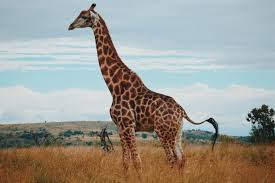

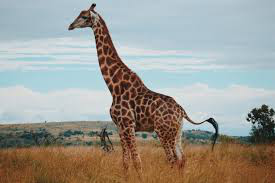

In [2]:
def download(url, max_dim=None):
  name = url.split('/')[-1]
  image_path = tf.keras.utils.get_file(name, origin=url)
  img = PIL.Image.open(image_path)
  if max_dim:
    img.thumbnail((max_dim, max_dim))
  return np.array(img)

# Normalize an image
def deprocess(img):
  img = 255*(img + 1.0)/2.0
  return tf.cast(img, tf.uint8)

# Display an image
def show(img):
  display.display(PIL.Image.fromarray(np.array(img)))


# Downsizing the image makes it easier to work with.
original_img = download("data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMSEhUSEhMVFRUVFRYVFRUVGBUVFxUWFRUXFhUXFRcYHSggGB4lGxcXITEiJykrLi4uFx8zODMsNygtLisBCgoKDg0OGhAQGy0lHyUtLS0tLS0tLS0rLS0tLS0vLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tKy0tLS0tLS0tLf/AABEIALcBEwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAACAAEDBAUGBwj/xAA9EAABAwIDBQYEBAYBBAMAAAABAAIRAyEEEjEFE0FRYQYicYGRoTKxwfAUQlLhBxUjYtHxM0NykqIWstL/xAAZAQADAQEBAAAAAAAAAAAAAAAAAQIDBAX/xAAjEQACAgICAwEBAQEBAAAAAAAAAQIRAxITITFBUQRhIrGB/9oADAMBAAIRAxEAPwDrQU4KhCMLc5rJYRAKMIkAGAiUcpwUBZIE8oAUUoALMnDkKGrVDWlziA1oJJOgAuSUATArme0nat2Hr0sPRomvUf8AEAYyz8I8TqeQusA9tMVVqO3LGNpXylwk5dJdfVNsWlUcW42k7eVg+o2pTqQBVEwSx0SDlI6cuSweVN0jpWClcj0dJU9n7RbVBizmwHsOrSQDHUQdVczLZO/BztV0xk6Up5TEME8J08JDGhLKnSQAk0p00IAWZNmTFNCAHzJsyZJMQ+ZLMhlNKQws6EuTJiEAMXISURahIQABQlSFCUADCZFmSQBEEQQBqKEyQgiCAIggAgiAQhECgAgiAQZkQcgAja5NlwnafbQxTtxSJdRBGcsN6hHAH9M/5W32zoV6tDc0GF+8MPhzW90CYJPAn5LL2P2SqiiG1ajWHixoJA8XAiT7LLJs+kjfHrH/AE2cjtvZzKX9Rmdro/42PtwAzE6C/ml2ba/esD3vBz54JiWu1g8T3Rp+oLsWdhWkzVxL3iTYNaP/ALT8lQ2v2UGHdvm4h4ZEFzsuanEmGEAfF4fljispQklbNo5IN0vZTxe33UMQzEMEtaN1UGhdBkseBYObNj48l6Zg67atNtRhlr2hwPQiV49np5Krmgl1Rm9LakRGctlsaOMkrs/4b7UzUXYdxk0jLerHfODPqEYZ90V+jF/nb4drlTQo86fOuo4bDSlR5ksyKFYcpIJSlFBYaaE0pSgB4ShNKZADpkikgBJJkyBhSmlNKaUgEUJTpkAAUJCkKEoAjhJHKSABhOGrSGGCcUQErK1M0MKfIVpFjU7WN4BFi1M0MPJEKJ5LUypw0I2HoZv4d3JE3COP+wtAeCJrh+ko2YaoofgndE34YrQNUcQU28Yi2FRKX4dY/a7BB+DriC7Kw1A0ak0++B55Y810wczmFHimse1zD+Zpb6ghJ21QKk7s8INduWnvKQmqDSGR0BrGvblMXGYFafZfaNOhjmCnJpPik8niXaOA4d4ehWdsoOgNLc1ClPeIghzLlwPMuBt1VU4enlmk8kt7zgRlIadD1IIXCnqz1nHZUe6FgSyqt2ax4xOGp1bSW5Xxwe2zve/mtM4c8l3qVqzyXBp0VYTZVZNJAaSdiohISyqUsTJ2KiOEykTEICgUksqaECEkllTZUAIoUWVNlQAKUJ8hTFpQMaEMJyCmKAGKEpyhJQIeEkMpkDs2A532P3Rz09kJDuaHK/mPRZ0XbRKKn9p9v8pb7+13oot2/wDUh3T/ANXunSJcpfGWd7/afROHg8D6KuKb/wBXuluX8/dPVfQ3l8JjWjgfRIV/7T6IWU3jipRPRLoacmDvz+k+iW+P6T6I5PRNnd09UdD7+iFT+1PvunyQgnkfVPmPIooLZ4xtBlX8bXotEUW1KzYFmxUzETFie8FgUtm1Ws+AhxqhpJEQGgmT0uuo/iVWqMxb6be6KjWVLWmRlJPO7Cuf2piKrKoaXE/02CDJDpaJBHGTK4ZJqTSPUg04Js67+FW2Wsr1MNJyVJcydM7LH1HyC9VzDmvnbDVXU4exppZXBzHZrBwmzZ+V9F7P2T2zTxtAPBAqNgVWWlrucDgdQVvikn0zm/TBr/SOhzDmhdHRQnDjmn3A4/fotqX05NpfAt2OiE0R9lNuGpblvI+6fQW/iG3Leabds+yj3TU+5b0QLv4iHcjp6pbgKUYdqW4anaCn8RBuU25Vk0hzj1UbmgcSiwaZCaKE0lI5w6qI1EA6BLUOVO56AuTJEWoS1OXocyAGITFickoCSgB911ToZKSANPeAJxWCpAIgnoiOZloVZKIlvGfdVQnhGocjJyG8z7pDL1UQCUJ0Lf8AhIGjmnyt5lRwnhFCv+DwOaWUc0ydMQ8DmUUD9SBJIdnI/wAQMlHd4otzOg0b6CTnbPo71XCUcaHU3Vq9PNu3w12nxSbjiBC9X7R7LbicO+k6bw4Rrmacwj0jzXmDtn0nMfQpVZdUyuaHCwi/LWCVw/ojUr+nrfjybY6+GYHVMRnqVnDcsjNIt0DANHKXZm06uDqU61JxDnCQ0NhrqYJGV8Ezp9VTqVi4DDsMsZpze78zvPh0U+LxD6VJjWizg5ziRPHLF9Bb3WXhnS1as9o7O9oqeLph7ZY7QsdEyNYg3E8VrGo3ivn6lizQDBTDmueA6QXAiTOWRFuMdV612U2+MSwtdaqyzhz07wXVjyKXTPPz4XBbR8f8Om3jR/pLfjkq0JLfRHHyMtCoDwKYtby9iqyU9Uaj5PqLLo5FCCP0KCTzSk80ai3LBLf0lDnZyUJKZPUTyfwsCo3QBAXN/SoUyNQ5GGYPBCQOSEpiEUG7E7wUZRFCihcgDgUGUqQpJ0G7I8pSRpJD2ZIGlSNpHkroSAUchosCK/4coIV0JyAdUlkG8K9FFOrBw/VBuStNkZPG0RpKdtFHugluiuJlWE8K2GgJ7Jbj4v6U4ShXMoTGiEbhxMqheW9rdnMwOLdibltU5qbOAcfjnoCZj+4L1vchc7297PjF4N7R/wAlP+pTPGWi7fNsjxjks8lSjRtg2xys8v8Aw+Gp1muaXF9Uh7GGA1ua7QfNYv8AN6wc6STJIg3be4EaK1jsK7eUnsl4YGteR+V1MCQeVoQsw+7bVq1myHODqdMmCRJh9rgQY6rjSXvs9Nt+ui4XufTFd9Oaje60i0tA+PL00lSdncZVw9Rlb8wDhlc7LnZreeHCeoVTadc56NXNEta5rLjLaNeUhQ46md7VIFR2eL5bNDiHaz5cE0KX9PdNm46nXpipTMtNjzaRq08iFZyrxDZW3q2FeNxVbazw50h/Qt0tpOvIrudl/wATaROTEUXNcNXU++3qSHQW+6645U12ebP8zT68Ha5Usqq7K7S4TEf8VdhP6T3Hf+LoJ8lqlXuZcVeSoGohSKsZfBLKUbjWJETKI4pfh+RUuRPEJbMrjXwpEJoV0+CDIOSrczeIrMZKJ1DkQp8iUJObKWJeyqaBULmrRKByFNg8K9GeQmIWh5BQuptT3IeEqQkrGVqSe4cTLIKIFRkwmD1mb2Sgp5UMow0oCyQOTyorpwTyRQWHKZNfkmc6ECJAnBUYTgoGSZk+dAE8JDsIuSBQrJ7WbSGHwr6neJOWmMuoNRwZI8JJ8kPoErdHie3MrhV3elTFvII0LCCRAHCHBTbSw9KpUbTdVLKjabWmWyyQ0DUGRy0U2ObBFPD1m0m02gOYTlgkCHTxtA6QhxuHpVappy5tcZW54lj3gDzEniuWzvS9MjdVp79tAsmowbplR0xmAMSz/uVfYzAH1XvJcaYLyXHuueTAzDjc81pbZ2ZNWhWe9gJcxtRrZu5lnQ4CJkaa3WR/OKr2VS2GkOBcQ1olhOUB1rwSEqtdBffYGFpscxpfTneVIY2mS0uy/HOabd4CB9FqNw1Oi01nv3ud7wwNJDGkCYde9uVraqTDYsvLmZWAUqBMhoaQ57QXZY01i3JVNm7PFQMLiWtLi5tPjVy2AZNhyn90N2NKuyCps8vZmZanmJex35J07x1HnK6bsl2mq4R4ac76BIAZmc/u8X05JEjWBEqjhsQXw5wbTYC6mWQQHA6xOrtB6KDZ7AWv3TnOcSO5lggTDoaDytbmnsxapnudKu17Q9hBa4SCNCERcvJuze1qmEqlrC+rR3pZUYYJ+H4mDUxlP/lcXBHqFGsHta9plrgHNI0IIkH0XRCSkjiyQcGTlybMgTStKM7DJQ5kBKYlFCskzpjUUJKYlOhbEpqIHVCo5WB2o7U0sGBm773fCxpE9C7iB5I6QW2bxeUOYrzftR29ZUpOpUC9rjlJeLWmSBaZiPcKLsj2uNOjVdiH1Him1u7aYvJIAa4mTf0jyU7qx6uj0zMksvZ23KFakyq2o0BwmCYI4EHwKSq0T2adSpJ1TNqrBb2nZF6ZHi5vtCD/AOVt/LSnW+a1usKOWBfFM6dtRTNcuTZ2nJvuxHDvTPoEm9p3HRrdOZj1SeSBSxyOrdVPBPTqSuSd2lqcBTHjP+VDW7QVDBBBymYbobEXvcX08EckRaSO1zJi5cV/8hrG+aPJoT/zuu7/AKjfLJr5DkjkQaM7MVEQcuMdtCqf+sfvyUTsfVGtVx84KXLEfFI7gk81HvSuI/mNQH/kfN/z/ujOPq8Kj/Up8i+C439O035WZ2nwr6+FqsYJflzsGkvYQ9o8yI81zJ2k9pnePueJPoE7Nt1TMPcItcnX6ahPdNeBKLTuzzus2k5zjUa+nlAc7LfM2wbEmxmAbwtR+Lw7K29c54e5jS0FoIZmYMrrHvc7cVNtTZY3m9IDmunPTGs2ccvQwLc29ViVc5fmczM5jt04AFwnVkNF4i3kuVr0ehCV9ms+nkwtWmSHi1ak+fiLSCY6wPZUKeNeTX3YptG9BcXNaAWHNLXTreDzV3DYOk01TVc4uiWS0tbTJEN7x1FwCI5Ln8K5zwabzAMEO9hPNJeBvqRdo1Wtqms14IeXANM3JFwbaXWlQcau7LnOZVGbIGtBaxogNt+UD/KysRQaWgTlyTciJJgfRXcLXimCHtgBzahcDcFxDQ7jGvgpZcfhf2iabn0y/NVLgGta3uskGKjiRfW8W1RYNlJpNR9PK/OaZyEgQ8GXgGdPqqtPGU8uRrqjWlxJeNGuFi1w5aX1ViiagLLb1rmAOJJLTLiQRx0j1SbpDSRqswlRzmMAaahrtLHWbmawZQ55F73PlddP2L2ju3OwNVr6bmH+kKhBJabxPKZI535LG7K1c72kAADKGg6siBlB4ixPO/VdjtjZNLEgbwd5vwPbAezwP0Nlvhi2tkcmeaT1ka5togrVQ0EuI0kk2A8SsHD0MdTGUV6FRosH1WPD4/uyuh3sjqbFbWaRi3fiJ/K4ZaTf+ym0/wDs4ucOa6En8OVtL2LZ3ajCYis6hSrh1RtrB2VxFyGPIyv0Oh4Fa2Q815L2w7Jfy+MVhHP3Qe3OyZdSIMsc1+sTbib8QSvQuzW0nYjDsqkiTIJ5lpInzifNV2S2jXLUxYhDuqRKfYuiDaOLZRpOqPOVrRLnfpHPyXkG3DVfRy4gB9ad7SrgtyuoljYDiAYkXAcWxboD7I9wILXNBaQQQbgg6grke0mAoUhRa1/4elJa9jAC2pTc/MWOmSJdF+UqWmNNI8nwmIqUmh4aBmByvMTAMGROhn8w4CNFsbPy1c9M5aTqg7mVh7wL4yw0gOEi0i0T4ava/CBpqmi5oDDenlAaaZaC+HGczs1+F83nxzcWGFj6ZIqNgkwIDgZBafIcFDVFp2et4DsdRNNk985RLjAJtxBEjzSXD7J7R1mUmtayQM1y98klxJJ8yUkg6LIxNOCTmHVDTr03EhrnADUyL87FY9ERAJN+GgHOFI2o0GADPOVOo9vprU8a0N0cABq58+EQLquzbJy5SWkmwgm1xwIjTqqLaTanxNM66quKAmxI6cFSivZLk14Nn+eMgA5tIdZuvgo6O1g0hwLgB3QHHhzgDXyWXSphrwNWmdOJMCFZrtYGjujuyRxl3KTwj6I6SH23Z1mBxzKg5HTvWPlxQ43aTGvDYBMTb9rrnGYiweyM3M/Lrr/qFcY8lwh7s0ySQCDBkiIgBZUrNNnQTtt1HuGSIn4QTLvvorD9p4hxOSiS2whwIMnxjijbiKLS0nI1wMkjLmM8Lj5K3XxrjBZIi5JcYjTTTiqcl6RKi/ciTCYt5HfplpAFomRpOtrzZQO244PhtEOHXum9weXAq3T2sxkueILgMxHeGsDh1QM2vSc4ljQSNTlbfneLrO/dGleFsZO09v5qUZWh4BLg0kZYvHmYHqodg7U/o5Ny572xJbmdMiczuNzNgh7QYhlRjMjQXNMOkCS03IJAnh7o9nbRbSFKoGCN2KVQwIMEZXO5wQb8nFUpdeBNJ+zbx+G7ueCABmI6QTobyFymNxzWSKZLTVHeqifIEcAea7F+1KZ1aIjSD96LkMc1zmEA5N3ORrRmlkiYOvIEHksnK32dOKKSaRo7PE4d9F1RoLqRHxB2R1OXOOXiZvbgAoGdnqLaZqfiHEWk5I15Aouz9fugwXEvOYwGcBeoOPjbRdJiX0nNLHMEG3LjwPBEZJdMeWMvMWcs7YDKgzUq+YTfM3KfVS1MKyiykw7uowmXOOrTJ70jVtyIP1t0ODdSosysZbW5zXMaqlXwtIuc4ts4OaW6gTxaD8N72CblDwZR3VN/+nLU25S8kuOU5TbK15Mw3LBtEX6pPi5cX3h5AgZSwCGN52dqOSkx2Fl7WhpAzRAlzWuA1F+60WnzU2ysON9TYSARVyneAkviMxa0C1jx4KLOqjrtk1jQomtAzAZiCZlziJib8YT4ntTUzCHlsG4ytdI9NU2Kp5aDiWF0vGsX+LQDxKwq9AF+Yy7+waW5LfDNRVHB+iDk20bw228tgVnxJu4tzXgxMTw9yjqdqa7RbKT/AHtIBjqD9yuboYVpH5rmYn4W8ddU5p05gVH8AWuFwTqeRC3WRL2czhJ+kdJj+1zdxUbiaQaHU3tytIdmJbFgeF038Pdq0m4KmxzwHAwZtcyRcriNvYQy0ZgZgNBmbnKD7yrVTAljQGxlbaQQZ1CmWalaLjib6Z6xQxjHiWOBHMEFHnXkTcRVaTlPhy4n5qX8a+JzBpJ1AAPD0RH9KflBL80vKPWM64Dt7jzyeC3SXQxzTqYGvA/6XOPxD4gOcRe2Y8b6GyxcQH5hmBj6TdaSyJroyjjd9g18W+oMznkkd2CSbXn2MKE0pI1+KD58jw0PoiFI3t96oX0TA18PFZbHRq/R0myO0dSjRbTzVO7I7uSPiJtN0lzYwp5hJHIhcLN5my3GTPPysrA2Vl1cT48+iW/IAE68lLVrzY8rLjeaZ3L88AWbLdmnML3566KRuzDMF8jlz/z+ylpYkRPTnpzTfie97/4++izeWZfFj+EztjsIiI/yfv2Q1NnMdANhr9+3qpRXkdENR3JS8smXww+E9HZrJgWESPkETNnMLiDN/v6FQ0nwff6R80T699Y4DoAlyMOOK9FqhsekO84Ann9+KsNwFO5A+xEBVKWLJ0Fx9OimNcwPG0R98lXLL6JYY+kTvwNMnThHkoDs2k2WsbFiZ9E34ix56Hlp/hAcQIMftCXK/A+GPmivX2Y3LOXMR8InKC68ZiLxdZWBw2V27JIaWtJBs2CSHgg6HlzW7vie6NTBnoEmUgImCR5X1n75qo5uqZLwq7QsHRYWNzCHAQRN5jpbS/msuvQaKzqYB74zAjQkD4TxIkzZbDGGbcPn9/JVKlL+q4g6NbJEEkd6RB8TpfVJStlqFGXgKQpnKXGIhrWgu7rjOYg6xb0XTmk3KCZ9bysHEuINMtJb3S0mB+UvAk9ZB9FtVTFNhJLnCQ4mAc2okAxp8kSfspqx8jbAKJ2zxM5iOBI462HmUGYzP3bohq4gzxNws9hOJl7U2fDgQ4EOBbLhmIPDhobyiw7IqUqjnNIfIhwdIcAM8fpGWbaqxjDmYWu8bTaLmPKyzcTiCaRFOO48Pkk91183eOtjHDktoO0S1R2uLZDS0TcZ26QIF/ZZtCgBA48T46oXbRz4VjwBmaWx0NgTfhdVW1HOgiIkTfSwlGWVO0Tjh12aIos4qrUYwS6BHFR06sTJkknpH2FVzEuy3jrx69FnySL418BxFAOqstYBzvOIHzKmxTNBH392ROdBGlonmosUScsG5j/KWzYaJCw1EXvwj79UqjB6SgqU4nibevEqIPJNvf1Qmwojr4dosDHE8b81HTwjLg+N9TdKs6/EhVsRVLSL6jRaJyM5Je0O+g0GIuk3CNyy4Rr5KCvV0JHQpb0uH6T9FXYKrLdPCtgQ6BwEpIaBGUXA8klLZqkRWBgXjihdcA8jzjipj8QiBdO0Zun+9EWS4+iMGLcvQ2lSsbxAnXWEjRHD74+amBgeX1/ZJsaiJ9QiIuY+Rj00UtF9vL56KCLzPCE7XSSeX+gB7BSyV0Ww+deI9xwsgc/7t7epULYny9ETXAjLH2bKaNLLTH9fvihOII16ADw/381CHHTlDT0k3+fsjYyXRbn7cPKEUFjtqkjjwAHt9+KmHS33Hkoq1PTlHhznxN0VN4d7ed5+aTHZZw74J55Y9bGPvgpcxAHhHnY/fgq7RJJJETA99FI4nrNrlSBMx0SYvfjMLNxGILX3iCLzzbJ9h81YJiL3tzE+eigxFPMQHaddBcEqosZLj3wwETbvaCwP+1Lha5c0tcRo0xbUcf8A2TvcHQTe0fRNhKQALIvETpaQ76eqLAkZJEA3gx7qMt05685jRTsZFz4+qic7jy091NgV67M4tHOyqVqRzBgcAIc4tbAnMdTFxdaJEWmSdeAnkhc3pcxc29PNVGTQUjJxNQtinE3vHIA//n3W3hKcUw0DQXN+QF/dVKlMZpjXL9ef3daD3tiIM8TwCcpWhsCvpE6mIFh4+kKpSZAmytF0iekAnoJ+armqIAHC08z0UWIapTEhwiTrrppfxhHSiB5mDwUVTSR4DqUDq0Tbon5AnIEHr5ffFQ5R7Rz9ApWv4dIUT3aQJj6/ZTQELgLx5kqjWoTePp4cVfz8uvSFC5/y5c1abQnFMoMpmII5eNufO6YUiBz9p4+OhV56ieyRpqSPvoq2J1Kw8Pb9k6PJyHyTJlBgxFuXt+4UxaQbDr/hJJS2SOxpkDTWIPgnqOidbCPkEklK7Y59FbFVMp11A58tfZCzEffn+6SS1SVHPJ9krK8E9CPmpaVUAxw4/W3kkkpa6LTZZoumLXN/G+hUz6fHifv5pJLFvs1j3GxmGx0IHP0TUKMdJlx8BwHokkmJoMP+GLSLfupWVnROsnT1lJJSME1gc2bgQOc9YiyVelIGXS1pOiSSfgEHECPD6ffmk1mV2bgdfL/fukkkigg655WHzUTqmkWzC6SSQElSrqdPDzTAm4OtgPHkmSQMVSB10587J8TUiBxJk+QSSQS2V82a0/6lIvEgDn4WFzCZJXRLY1R0AXP3qhPpx84TpJFJliiw5TYD7lVSRMeKSSYyvUdqfFO4/JOkqEgWNmJUJqA+4A6fTVJJUhX2B98EkkkwP//Z", max_dim=500)
show(original_img)



In [0]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')

In [0]:
# Maximize the activations of these layers
names = ['mixed3', 'mixed5']
layers = [base_model.get_layer(name).output for name in names]

# Create the feature extraction model
dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers)


In [0]:
def calc_loss(img, model):
  # Pass forward the image through the model to retrieve the activations.
  # Converts the image into a batch of size 1.
  img_batch = tf.expand_dims(img, axis=0)
  layer_activations = model(img_batch)

  losses = []
  for act in layer_activations:
    loss = tf.math.reduce_mean(act)
    losses.append(loss)

  return  tf.reduce_sum(losses)


In [0]:
class DeepDream(tf.Module):
  def __init__(self, model):
    self.model = model

  @tf.function(
      input_signature=(
        tf.TensorSpec(shape=[None,None,3], dtype=tf.float32),
        tf.TensorSpec(shape=[], dtype=tf.int32),
        tf.TensorSpec(shape=[], dtype=tf.float32),)
  )
  def __call__(self, img, steps, step_size):
      print("Tracing")
      loss = tf.constant(0.0)
      for n in tf.range(steps):
        with tf.GradientTape() as tape:
          # This needs gradients relative to `img`
          # `GradientTape` only watches `tf.Variable`s by default
          tape.watch(img)
          loss = calc_loss(img, self.model)

        # Calculate the gradient of the loss with respect to the pixels of the input image.
        gradients = tape.gradient(loss, img)

        # Normalize the gradients.
        gradients /= tf.math.reduce_std(gradients) + 1e-8 
        
        # In gradient ascent, the "loss" is maximized so that the input image increasingly "excites" the layers.
        # You can update the image by directly adding the gradients (because they're the same shape!)
        img = img + gradients*step_size
        img = tf.clip_by_value(img, -1, 1)

      return loss, img

deepdream = DeepDream(dream_model)


In [0]:
def run_deep_dream_simple(img, steps=100, step_size=0.01):
  # Convert from uint8 to the range expected by the model.
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  img = tf.convert_to_tensor(img)
  step_size = tf.convert_to_tensor(step_size)
  steps_remaining = steps
  step = 0
  while steps_remaining:
    if steps_remaining>100:
      run_steps = tf.constant(100)
    else:
      run_steps = tf.constant(steps_remaining)
    steps_remaining -= run_steps
    step += run_steps
    print(img)
    loss, img = deepdream(img, run_steps, tf.constant(step_size))

    display.clear_output(wait=True)
    
    show(deprocess(img))
    print ("Step {}, loss {}".format(step, loss))

  
  result = deprocess(img)
  display.clear_output(wait=True)
  show(result)

  return result

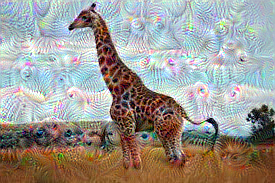

In [8]:
dream_img = run_deep_dream_simple(img=original_img, steps=100, step_size=0.01)

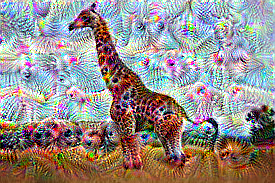

In [9]:
dream_img = run_deep_dream_simple(img=original_img, steps=400, step_size=0.01)

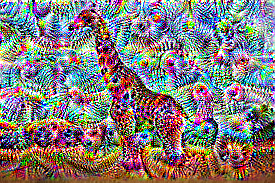

In [10]:
dream_img = run_deep_dream_simple(img=original_img, steps=1600, step_size=0.01)

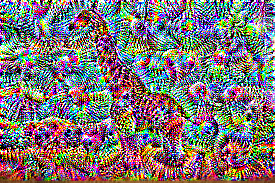

In [12]:
dream_img = run_deep_dream_simple(img=original_img, steps=6400, step_size=0.01)

In [15]:
base_model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet')

/tensorflow-2.1.0/python3.6/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


9412608/9406464 [==============================] - 0s 0us/step


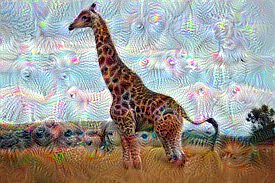

In [16]:
dream_img = run_deep_dream_simple(img=original_img, steps=100, step_size=0.01)

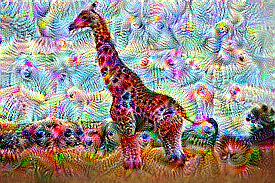

In [17]:
dream_img = run_deep_dream_simple(img=original_img, steps=400, step_size=0.01)

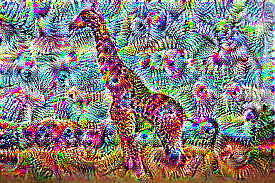

In [18]:
dream_img = run_deep_dream_simple(img=original_img, steps=1600, step_size=0.01)

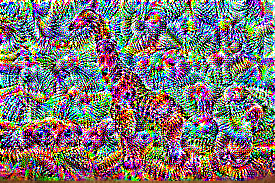

In [19]:
dream_img = run_deep_dream_simple(img=original_img, steps=6400, step_size=0.01)